In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import oneshot as sm
import rfm, skipRFM, deepSkip, localSkip_2_2, localDeepSkip_8_1, localDeepSkip_2_2, localSkip_8_1, localSkip
# import parallel_euler as arch1
import torch
from torch import nn
import ks, l63, l96, ks_torch, ks0, ks1
import config

**Do V and KT match on small KS? (Yes they do)** 

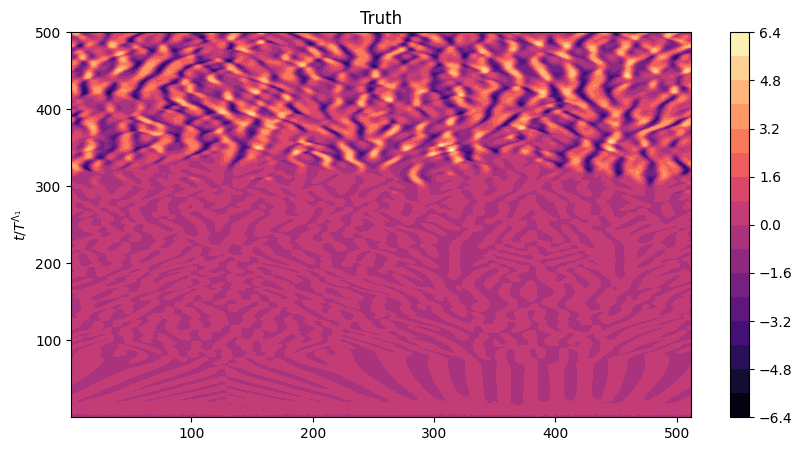

In [3]:
L, dt, N = 200/(2.*np.pi), 0.01, 512
tau = {'error_threshold' : 0.25, 'dt': dt, 'Lyapunov_time': 1}
dns  = ks.KS(L=L, dt=dt, N=N, tend=500)
dns.simulate()
uu = ks0.ks(L=L, dt=dt, N=N, tmax=500)
ut.waterfall(uu-dns.uu, **tau)

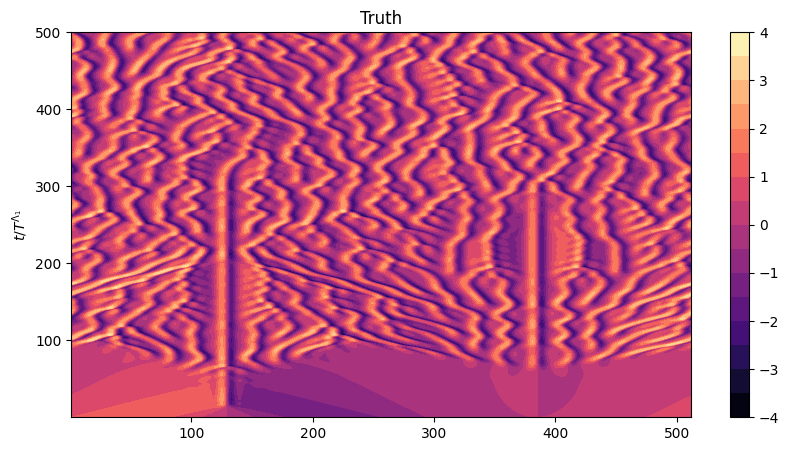

In [5]:
ut.waterfall(dns.uu, **tau)

**Look at the covariance structure**

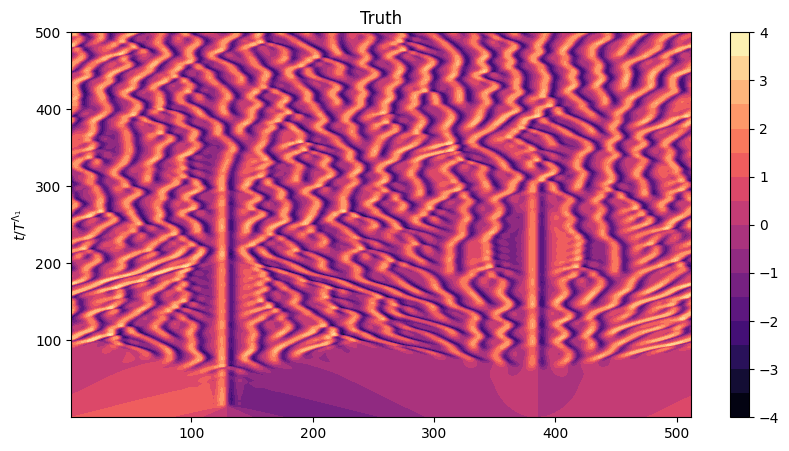

In [6]:
ut.waterfall(uu, **tau)

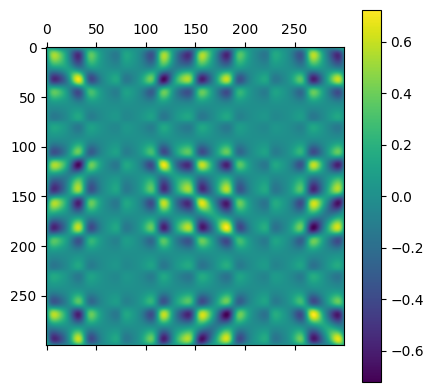

In [3]:
im = plt.matshow(np.cov(uu))
plt.colorbar(im)

**Try SkipRFM**

Time taken by gen_data is 13.7153 seconds


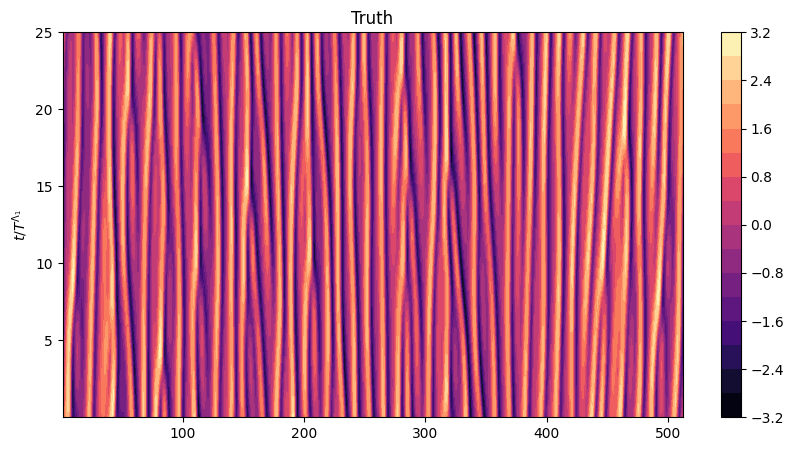

tensor([205.0000, 207.0000,   0.2527,   0.2486])


In [24]:
train, test = ks.gen_data(dt=dt, L=L, N=N, train_size=int(1e5), test_num=100)
train, test = torch.tensor(train), torch.tensor(test)
ut.waterfall(train[:, :2500], **tau)
L0, L1 = 0.4, 3.5
D, D_r, B = N, 512, 1
beta = 1
data_folder = '../data'
drf_args = [D_r, B, L0, L1, train, beta, 'SkipRFM', f'{data_folder}/SkipKS-small', False]
batch = skipRFM.BatchDeepRF(train, test, *drf_args)
batch.drf.learn(train, 42)
print(batch.get_tau_f(batch.drf, test[47], error_threshold=0.25, dt=1, Lyapunov_time=1))

**Shape of the attractor**

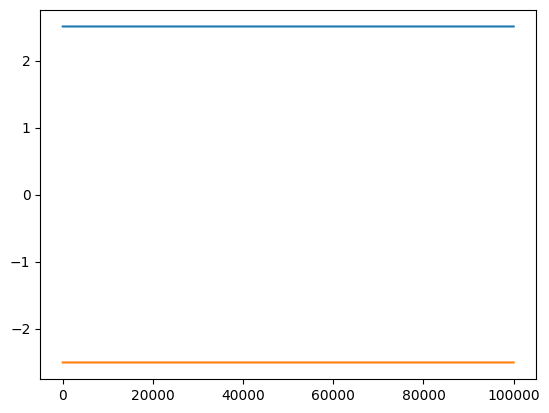

In [76]:
plt.plot(torch.max(train, dim=0)[0])
plt.plot(torch.min(train, dim=0)[0])

**Try LocalSkip**

In [15]:
drf_args = [512, 1, L0, L1, train, 1, 'LocalSkip', f'{data_folder}/LocalSkipKS-small', False, 5, 2]
drf = localSkip.DeepRF(*drf_args)
drf.learn(train, 42)
print(drf.compute_tau_f(test[:10], error_threshold=.25, dt=1, Lyapunov_time=1))

Time taken by compute_tau_f is 0.7667 seconds
(tensor([216., 195., 206., 181., 190., 206., 199., 200., 181., 217.]), tensor([229., 211., 214., 194., 207., 214., 217., 212., 181., 246.]), tensor([[0.0000e+00, 5.9440e-06, 2.3764e-05,  ..., 1.6373e+00, 1.6379e+00,
         1.6385e+00],
        [0.0000e+00, 8.1949e-06, 3.2781e-05,  ..., 1.6443e+00, 1.6456e+00,
         1.6468e+00],
        [0.0000e+00, 5.8836e-06, 2.3543e-05,  ..., 1.7785e+00, 1.7794e+00,
         1.7802e+00],
        ...,
        [0.0000e+00, 6.5591e-06, 2.6237e-05,  ..., 1.9798e+00, 1.9806e+00,
         1.9815e+00],
        [0.0000e+00, 7.1236e-06, 2.8519e-05,  ..., 1.7276e+00, 1.7284e+00,
         1.7293e+00],
        [0.0000e+00, 6.4670e-06, 2.5845e-05,  ..., 2.0264e+00, 2.0281e+00,
         2.0297e+00]]), tensor([[0.0000e+00, 5.0977e-06, 2.0379e-05,  ..., 1.6547e+00, 1.6555e+00,
         1.6564e+00],
        [0.0000e+00, 7.9660e-06, 3.1858e-05,  ..., 1.5740e+00, 1.5750e+00,
         1.5761e+00],
        [0.0000e+00, 5

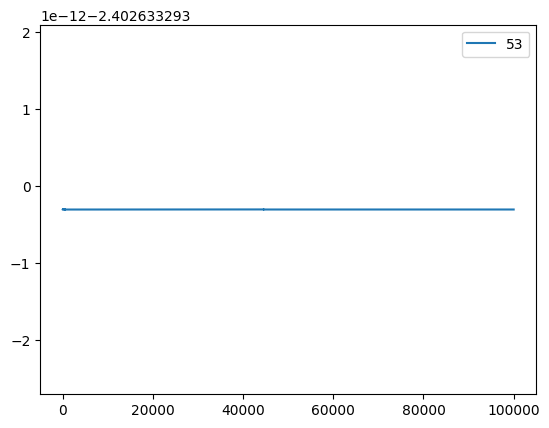

In [105]:
i = np.random.randint(N)
plt.plot(train[i, :], label=f'{i}')
plt.legend()

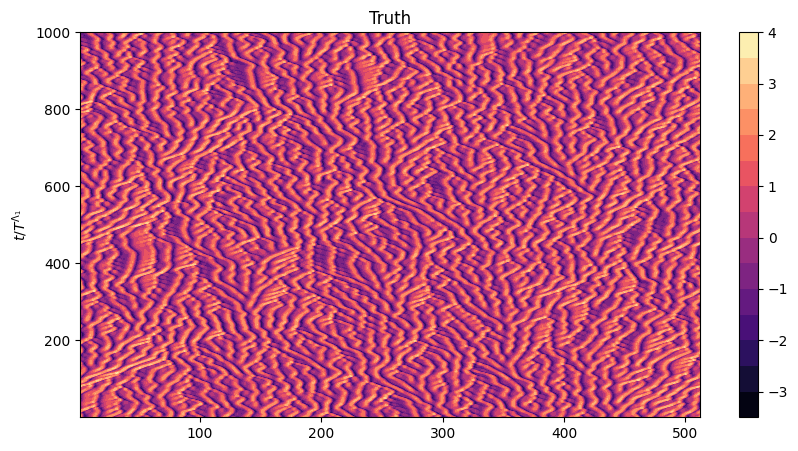

In [19]:
ut.waterfall(train, **tau)

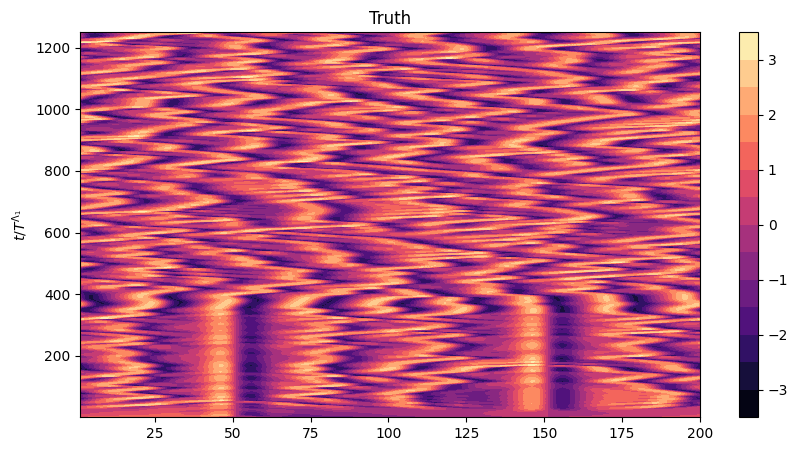

In [286]:
ut.waterfall(dns.uu[:, :5000], **tau)

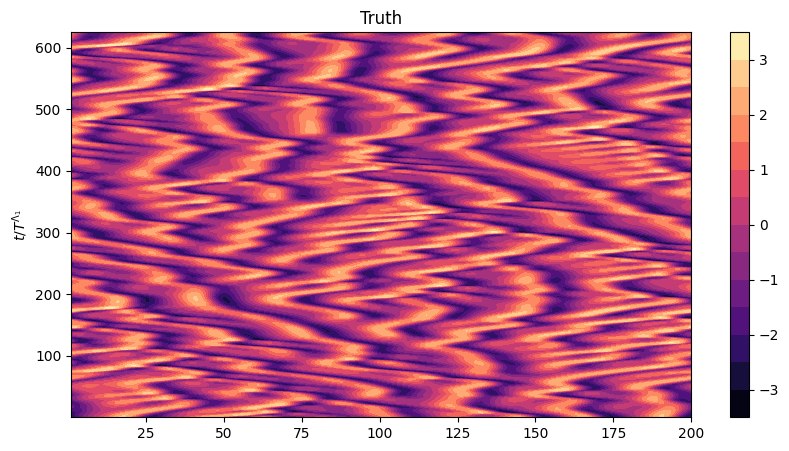

In [141]:
uu[:, :2000].std(axis=1)

array([0.10662058, 0.11198436, 0.11741712, 0.12281506, 0.12828284,
       0.13412604, 0.14078893, 0.1487344 , 0.15828944, 0.16950868,
       0.18210982, 0.19549951, 0.2088657 , 0.22129546, 0.23188661,
       0.23983928, 0.2445269 , 0.24555308, 0.24280497, 0.23651625,
       0.22735329, 0.21653   , 0.20592146, 0.19805195, 0.19569399,
       0.20088616, 0.21381027, 0.23248548, 0.25345434, 0.27268224,
       0.28615502, 0.29023548, 0.28196477, 0.25938575, 0.22186148,
       0.17030793, 0.10724907, 0.03662878, 0.03662878, 0.10724907,
       0.17030793, 0.22186148, 0.25938575, 0.28196477, 0.29023548,
       0.28615502, 0.27268224, 0.25345434, 0.23248548, 0.21381027,
       0.20088616, 0.19569399, 0.19805195, 0.20592146, 0.21653   ,
       0.22735329, 0.23651625, 0.24280497, 0.24555308, 0.2445269 ,
       0.23983928, 0.23188661, 0.22129546, 0.2088657 , 0.19549951,
       0.18210982, 0.16950868, 0.15828944, 0.1487344 , 0.14078893,
       0.13412604, 0.12828284, 0.12281506, 0.11741712, 0.11198

In [2]:
train, test = ks.gen_data()

/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
  self.vv[0] = v0
/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py:115: ComplexWarning: Casting complex values to real discards the imaginary part
  self.vv[self.ioutnum, :] = self.v


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/pman0581/miniconda3/envs/metal/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/v9/pbbcbpgd4mj4sbplbm4ht36r0000gq/T/ipykernel_52890/937438683.py", line 1, in <module>
    train, test = ks.gen_data()
                  ^^^^^^^^^^^^^
  File "/Users/pman0581/Documents/GitHub/DeepRFM/modules/utility.py", line 15, in new_func
    val = func(*args,**kwargs)
          ^^^^^^^^^^^^^^^^^^^^
  File "/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py", line 129, in gen_data
    dns.simulate()
  File "/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py", line -1, in simulate
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pman0581/miniconda3/envs/metal/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback


In [8]:
np.random.randint(3, size=5)

array([2, 0, 0, 1, 1])

In [1]:
(3e5)*100

30000000.0

In [10]:
0.001*250

0.25

In [11]:
22/64

0.34375